## Importing Packages

In [1]:
import mxnet as mx
from mxnet import image
from mxnet.gluon import nn
from matplotlib import pyplot as plt

## Plotting the Dataset

<Figure size 432x288 with 0 Axes>

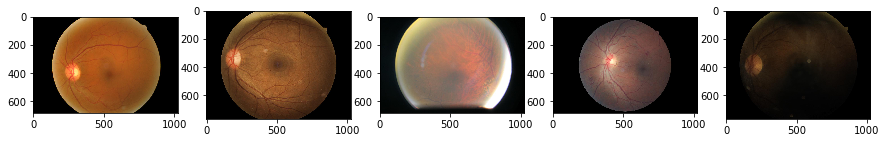

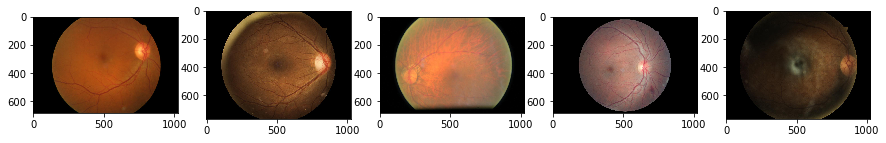

In [2]:
plt.figure()
f, axarr = plt.subplots(1,5, figsize=(15,15))
f_, axarr_ = plt.subplots(1,5, figsize =(15,15))
for i in range(5):
    axarr[i].imshow(plt.imread('{}_left.jpeg'.format(i)))
for i in range(5):
    axarr_[i].imshow(plt.imread('{}_right.jpeg'.format(i)))

## Developing the models

In [3]:
net_0 = nn.Sequential()
with net_0.name_scope():
    net_0.add(    
            nn.Conv2D(channels=1, kernel_size=(3,3),in_channels=1,strides=(1,1),padding=(0,0),activation='relu',prefix='conv_'),
            nn.MaxPool2D(pool_size=(4,4)))
            
    net_0.initialize(init=mx.init.Xavier())

In [4]:
net_1 = nn.Conv2D(channels=1, kernel_size=(3,3),in_channels=1,strides=(1,1),padding=(0,0),activation='relu',prefix='conv_')
net_1.initialize(mx.init.Constant([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
]))

In [5]:
net_2 = nn.MaxPool2D(pool_size=(8,8))
net_2.initialize(init=mx.init.Xavier())

## Plotting Function

In [6]:
def _plot_(model, i):
    image_r = mx.image.imread('{}_right.jpeg'.format(i),0).astype('float32')
    image_channel_first_r = image_r.transpose((2,0,1))
    image_batchified_r = image_channel_first_r.expand_dims(axis=0)
    output_r = model(image_batchified_r)
    
    image = mx.image.imread('{}_left.jpeg'.format(i),0).astype('float32')
    image_channel_first = image.transpose((2,0,1))
    image_batchified = image_channel_first.expand_dims(axis=0)
    output = model(image_batchified)
    
    
    func, ax = plt.subplots(1,2, figsize=(10,10))
    ax[0].imshow(output.squeeze().asnumpy())
    ax[1].imshow(output_r.squeeze().asnumpy())    

## Plotting for Separate Models

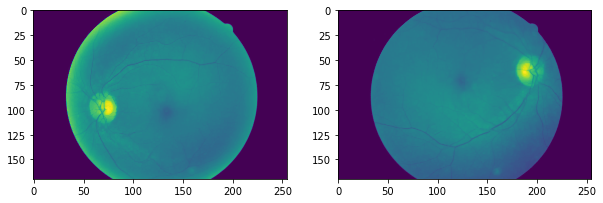

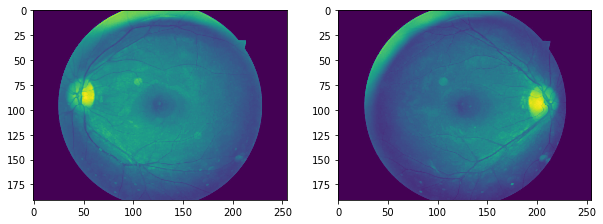

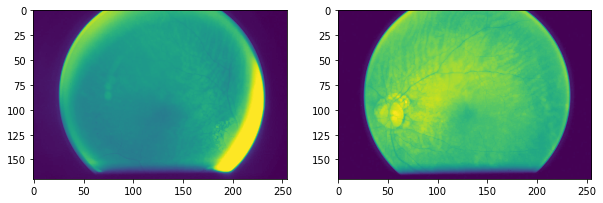

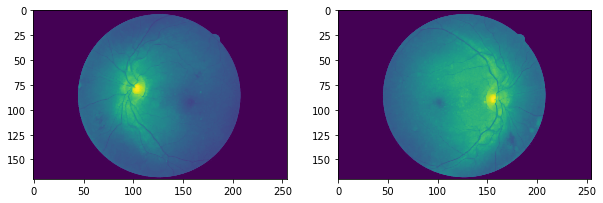

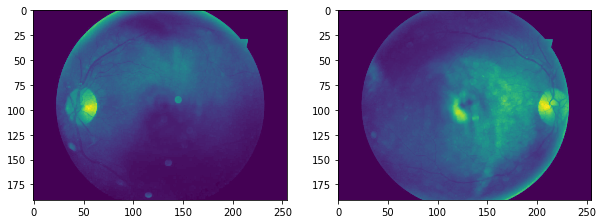

In [7]:
for i in range(5):
    _plot_(net_0,i)

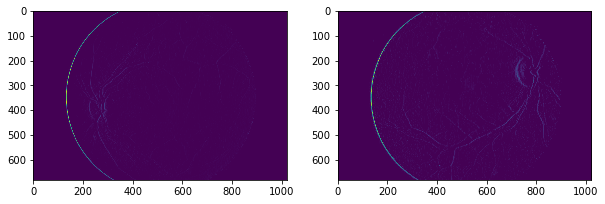

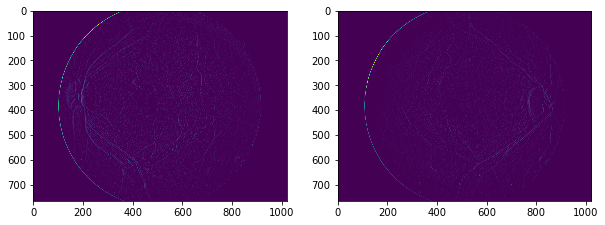

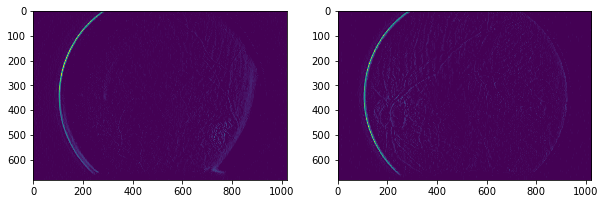

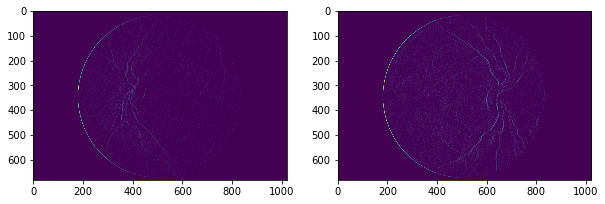

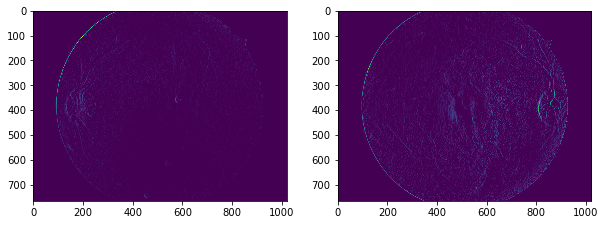

In [8]:
for i in range(5):
    _plot_(net_1,i)

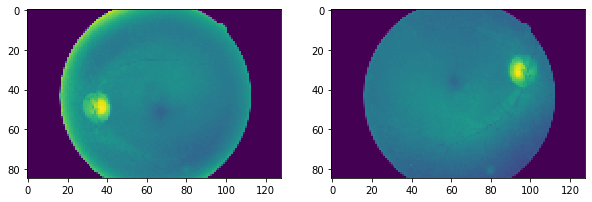

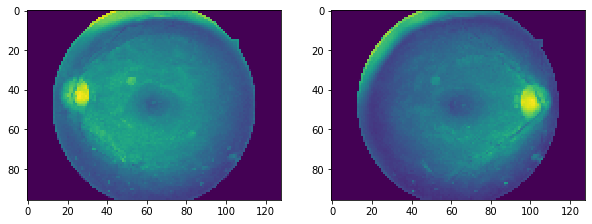

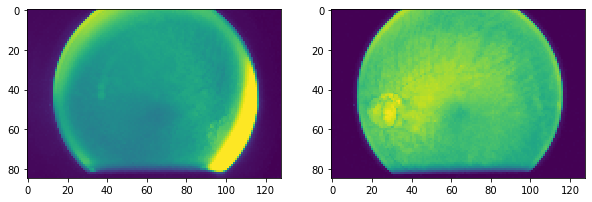

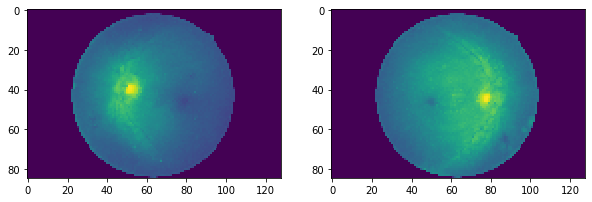

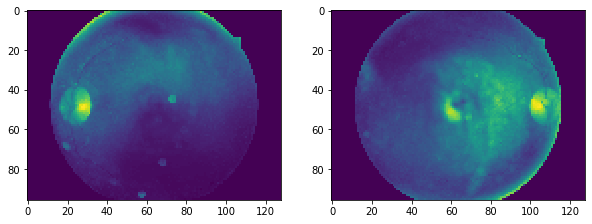

In [9]:
for i in range(5):
    _plot_(net_2,i)